In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt


In [16]:
import pickle

# Chemin vers le fichier pickle
chemin_fichier_pickle = '/Users/Suzie/Desktop/Stage mtl/data2.pkl'

# Ouvrir le fichier en mode lecture binaire
with open(chemin_fichier_pickle, 'rb') as fichier:
    aggregated_agents = pickle.load(fichier)

# Maintenant, "aggregated_agents" contient l'objet sauvegardé dans le fichier pickle
print(aggregated_agents)

[array([[0.26904201, 0.25602368],
       [0.26272766, 0.3332244 ],
       [0.28518703, 0.30247756],
       ...,
       [0.26286903, 0.25448243],
       [0.23941701, 0.25117555],
       [0.25035839, 0.24695371]]), array([[0.287189  , 0.35342672],
       [0.20857845, 0.32623473],
       [0.3120089 , 0.22717434],
       ...,
       [0.23786595, 0.23190826],
       [0.26214091, 0.25528044],
       [0.25425045, 0.24779381]]), array([[0.25876126, 0.28624756],
       [0.29207636, 0.28095729],
       [0.2455798 , 0.31086215],
       ...,
       [0.23555927, 0.24042667],
       [0.29108367, 0.28942203],
       [0.2501165 , 0.24326826]]), array([[0.23266516, 0.30387814],
       [0.32762708, 0.25200779],
       [0.25274417, 0.31872551],
       ...,
       [0.25145187, 0.25485655],
       [0.23084278, 0.24043457],
       [0.25416553, 0.25808408]]), array([[0.23441165, 0.30362254],
       [0.28902673, 0.29821797],
       [0.24441442, 0.304941  ],
       ...,
       [0.2446052 , 0.26146113],
       

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_793/3521879057.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_793/3521879057.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()
/Users/Suzie/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


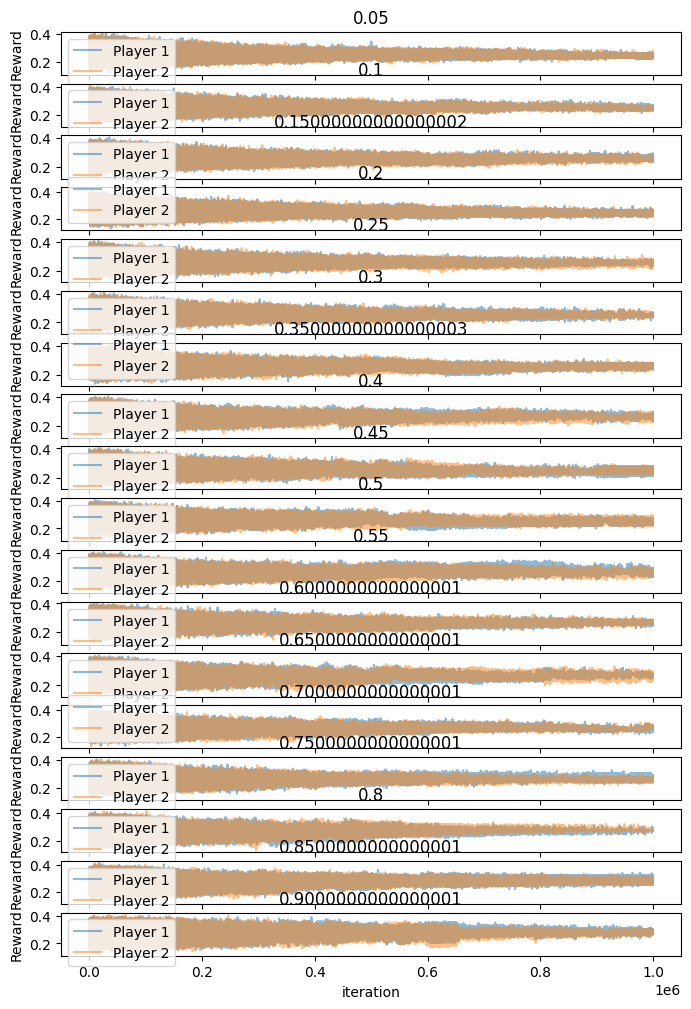

In [17]:
import matplotlib.pyplot as plt
import numpy as np


num_graphs = len(aggregated_agents)
smart_label = ma_liste

# Créer une figure avec autant de sous-graphiques que de périodes
fig, axes = plt.subplots(nrows=num_graphs, figsize=(8, 12))

# Boucle pour itérer à travers les périodes et les sous-graphiques
for graphs in range(num_graphs):
    ax = axes[graphs]
    num_players = len(aggregated_agents[graphs][0])
    # Tracer les courbes pour chaque joueur dans le sous-graphique
    for player in range(num_players):
        ax.plot(aggregated_agents[graphs][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Titre du sous-graphique avec la période correspondante
    ax.set_title(f'{smart_label[graphs]}')
    
    # Ajouter une légende pour chaque sous-graphique
    ax.legend()
    
    # Nommer les axes du sous-graphique
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [11]:
prices = res.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.23975274 0.25162075]
 [0.2750885  0.21152521]
 [0.35596588 0.32393366]
 [0.18297777 0.22460254]
 [0.30112465 0.27190171]
 [0.24725075 0.29283329]
 [0.29597515 0.28819872]
 [0.40736349 0.35122518]
 [0.20811868 0.2828444 ]
 [0.26421907 0.34689856]
 [0.36377885 0.31282646]
 [0.39469326 0.42879035]
 [0.45251415 0.38317519]
 [0.35790581 0.45334006]
 [0.43642102 0.35215075]
 [0.43940989 0.56418066]
 [0.58524985 0.5569721 ]
 [0.55626276 0.52300591]]


In [12]:
debut = 0.05
fin = 0.95
pas = 0.05

# Utilisation d'une boucle pour créer la liste
ma_liste = [debut + i * pas for i in range(int((fin - debut) / pas) + 1)]

[0.24568674 0.24330686 0.33994977 0.20379016 0.28651318 0.27004202
 0.29208693 0.37929433 0.24548154 0.30555881 0.33830265 0.4117418
 0.41784467 0.40562294 0.39428588 0.50179528 0.57111098 0.53963433]


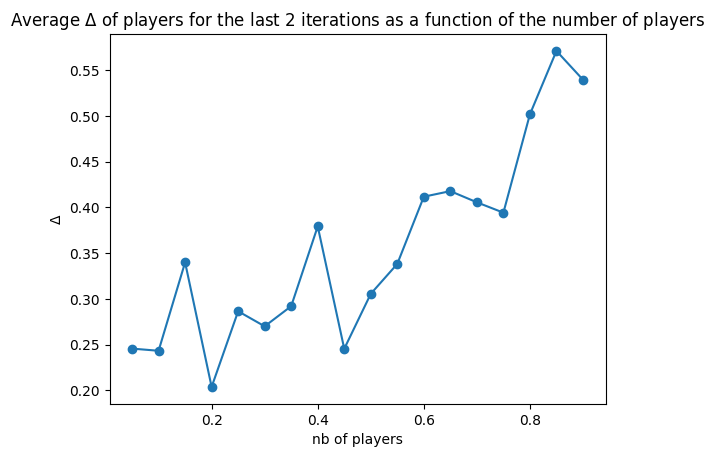

In [13]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot(ma_liste,av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 2 iterations as a function of the number of players')
plt.show()

In [14]:
aggregated_agents = []
for delta in [0.95,0.80,0.65,0.50,0.35]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop)
        agents = [Q.Agent(delta=delta) for _ in range(2)]
        env = Q.Env()

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(10):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].S, agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2


In [9]:
with open('data.pkl', 'wb') as f:
    pickle.dump(aggregated_agents, f)

In [10]:
with open('data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [11]:
loaded_data

[array([[0.32866736, 0.24712139],
        [0.30729538, 0.26210863],
        [0.33110822, 0.15254443],
        [0.24376109, 0.26563157],
        [0.31492913, 0.28564285],
        [0.29913214, 0.258357  ],
        [0.32655947, 0.21154413],
        [0.36961574, 0.18270201],
        [0.2269626 , 0.34154722],
        [0.2693117 , 0.30657866]]),
 array([[0.26364713, 0.28888576],
        [0.33590966, 0.1932343 ],
        [0.21163648, 0.28639868],
        [0.26653875, 0.33103002],
        [0.14718368, 0.33789888],
        [0.27239421, 0.23376488],
        [0.2502816 , 0.35136782],
        [0.20554328, 0.33353798],
        [0.33244716, 0.1574954 ],
        [0.33225783, 0.29545598]]),
 array([[0.27737129, 0.28256695],
        [0.26039292, 0.25875012],
        [0.28198231, 0.25638693],
        [0.30095008, 0.31064577],
        [0.24213186, 0.27289464],
        [0.34231832, 0.22983067],
        [0.29982672, 0.32902866],
        [0.25679852, 0.27307709],
        [0.26600008, 0.30512758],
        [0

## Variation du $\delta$

Intuition : Il y a une valeur seuil de $\delta$ en dessous de laquelle il ne peut y avoir collusion. Ici en théorie la valeur seuil est 0.47 

In [3]:
aggregated_agent1 = []
aggregated_agent2 = []
for delta in [0.95,0.80,0.65,0.50,0.35]:
    total_reward1 = []
    total_reward2 = []
    for loop in range(3):
        print(loop)
        agent1 = Q.Agent(delta=delta)
        agent2 = Q.Agent(delta=delta)
        env = Q.Env()
    
        temps = []
        reward1 = []
        reward2 = []
        epsilon = []
        prices1 = []
        prices2 = []

        #1) On initialise p0 (on va le faire direct dans agent)
        agent1.p = np.random.choice(agent1.A)
        agent2.p = np.random.choice(agent2.A)
        #Initialisation de l'etat
        #s_t
        s_t = env([agent1.p,agent2.p])[1]
        agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
        agent2.s_t = s_t

        s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
        agent1.s_ind = s_ind
        agent2.s_ind = s_ind


        #Phase itérative
        for t in range(10**(6)):
        #Action et état t+1
            #a_t
            agent1.a_ind = agent1.get_next_action()
            agent2.a_ind = agent2.get_next_action()
    
            #s_t+1
            s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
            agent1.s_t1 = s_t1
            agent2.s_t1 = s_t1
    
            s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
            agent1.s_ind1 = s_ind1 
            agent2.s_ind1 = s_ind1
   
            #Alimenter vecteurs temps et reward
            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret
        
            re = ret[0]*ret[1]-ret[0]*ret[2]
            reward1.append(re[0])
            reward2.append(re[1])
            epsilon_value = agent1.epsilon
            epsilon.append(epsilon_value)
            prices1.append(agent1.p)
            prices2.append(agent2.p)
    
    
    
            #Les updates pour le prochain tour 
    
            agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
            agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
        total_reward1.append(reward1)
        total_reward2.append(reward2)
    aggregated_agent1.append(np.array(total_reward1).mean(axis=0))
    aggregated_agent2.append(np.array(total_reward2).mean(axis=0))
    

0
1
2
0
1
2


KeyboardInterrupt: 

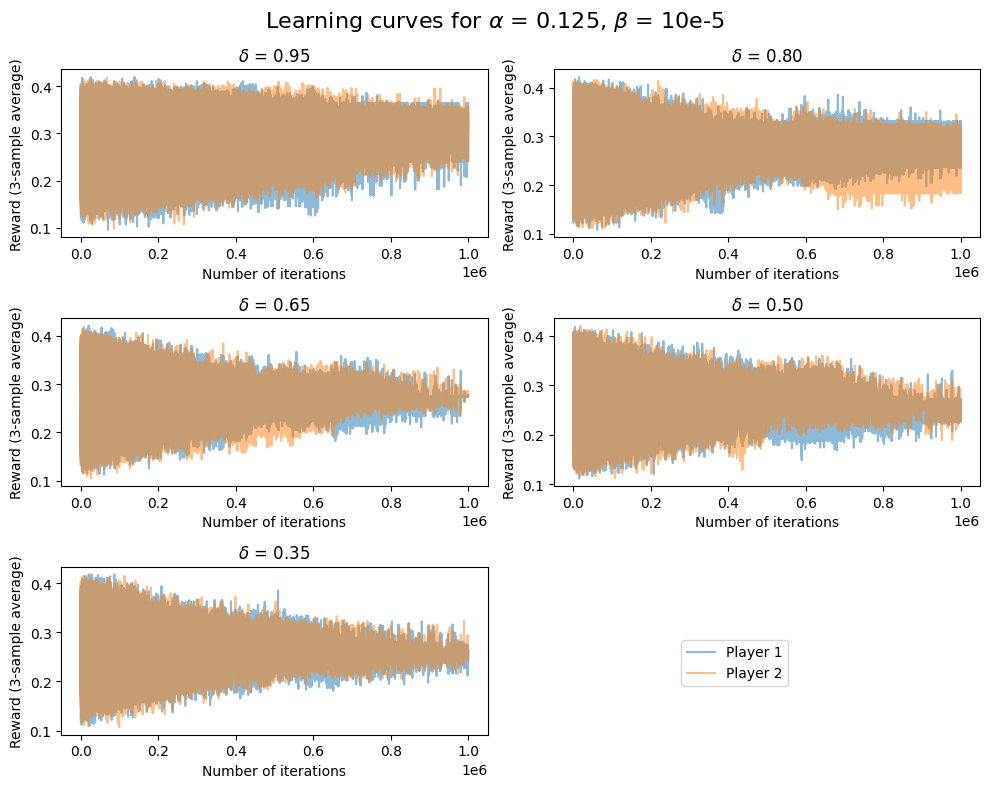

In [ ]:

# Créer une figure et des sous-graphiques (3 lignes, 2 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

line1, = axes[0, 0].plot(aggregated_agent1[0], alpha=0.5, label = 'Player 1')
line2, = axes[0, 0].plot(aggregated_agent2[0], alpha=0.5, label = 'Player 2')
axes[0, 0].set_title('$\\delta$ = 0.95')

axes[0, 1].plot(aggregated_agent1[1], alpha=0.5, label = 'Player 1')
axes[0, 1].plot(aggregated_agent2[1], alpha=0.5, label = 'Player 2')
axes[0, 1].set_title('$\\delta$ = 0.80')

axes[1, 0].plot(aggregated_agent1[2], alpha=0.5, label = 'Player 1')
axes[1, 0].plot(aggregated_agent2[2], alpha=0.5, label = 'Player 2')
axes[1, 0].set_title('$\\delta$ = 0.65')

axes[1, 1].plot(aggregated_agent1[3], alpha=0.5, label = 'Player 1')
axes[1, 1].plot(aggregated_agent2[3], alpha=0.5, label = 'Player 2')
axes[1, 1].set_title('$\\delta$ = 0.50')

axes[2, 0].plot(aggregated_agent1[4], alpha=0.5, label = 'Player 1')
axes[2, 0].plot(aggregated_agent2[4], alpha=0.5, label = 'Player 2')
axes[2, 0].set_title('$\\delta$ = 0.35')


fig.delaxes(axes[2, 1])

lines = [line1, line2]
labels = ['Player 1', 'Player 2']
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.8,0.2))

# Nommer les axes (identique pour tous les sous-graphiques)
for ax in axes.flat:
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Reward (3-sample average)')

# Titre général de la figure
fig.suptitle('Learning curves for $\\alpha$ = 0.125, $\\beta$ = 10e-5', fontsize=16)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [ ]:
RN = 0.23
RM = 0.34
Rmean1 = np.zeros(5)
Rmean2 = np.zeros(5)
DRmean1 = np.zeros(5)
DRmean2 = np.zeros(5)
for i in range (len(aggregated_agent1)): 
    Rmean1[i] = aggregated_agent1[i][-100:].mean() 
    Rmean2[i] = aggregated_agent2[i][-100:].mean()
    DRmean1[i] = (Rmean1[i] - RN)/(RM - RN) 
    DRmean2[i] = (Rmean2[i] - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

[0.75494031 0.41821515 0.41022466 0.22254015 0.21351104]
[0.62778993 0.31508715 0.44713455 0.23448306 0.25737925]


[0.69136512 0.36665115 0.4286796  0.2285116  0.23544515]


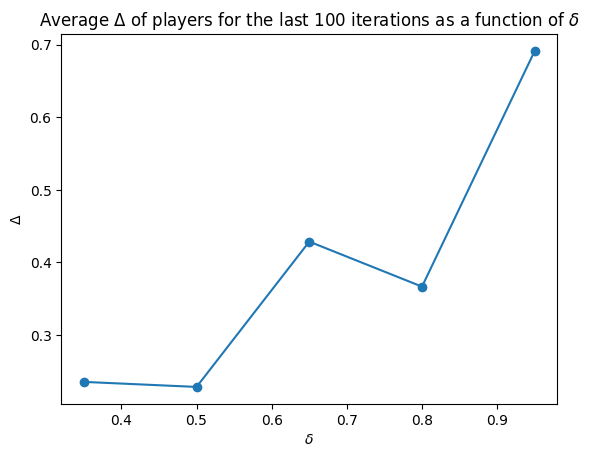

In [ ]:
DRmean12 = [DRmean1,DRmean2]
DRmean = np.mean(DRmean12, axis=0)
print(DRmean)
plt.plot([0.95,0.80,0.65,0.50,0.35],DRmean, linestyle='-', marker='o')
plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of $\\delta$')
plt.show()